#Where are we: Have we seen a DFG flip?

There are a few things to look at here. Mostly we are interested in making sure we are actually analyzing meaningful things in our kinase simulations so that we can drive a transition along that coordinate. The main things to investigate along these lines are:
 - Is the DFG dihedral we are using misleading?
 - How informative are the dihedrals Josh found in analyzing ensembler started models?
 - Are the reaction coordinates of this paper useful to look at? http://www.ncbi.nlm.nih.gov/pubmed/25839999
 - Can we use this ipynb embbeded structure viewer to useful confirm our analysis: https://github.com/arose/nglview
 - Are the KER salt bridge distances actually useful distances in this context?
 - I also want to use snippets from David's new notebook to help investigate these things: https://github.com/choderalab/octomore/blob/master/11400-run24.ipynb

##Section 1: The current DFG dihedral and Src sims (project 11401)

Here we are just going load in already saved dihedrals for separated runs.
Also note this needs to be run on the cluster. Checkout this discussion for how to get ipython notebooks to work on the cluster: https://github.com/cBio/cbio-cluster/issues/334#issuecomment-151602300

Also note I've just dumped all the code here, though I'm also in the process of cleaning it up and migrating it
to the 'kinalysis' repository.

In [2]:
import matplotlib

import mdtraj as md
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from msmbuilder import dataset

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:

# load clone0 of each trajectory

Abl_trajectories_0 = dataset.MDTrajDataset("/cbio/jclab/projects/fah/fah-data/munged2/no-solvent/11400/*clone0.h5")
Src_trajectories_0 = dataset.MDTrajDataset("/cbio/jclab/projects/fah/fah-data/munged2/no-solvent/11401/*clone0.h5")


In [4]:
# define DFG dihedral (this is from Roux umbrella sampling paper and are AlaCbeta, AlaCalpha, AspCalpha, AspCgamma)

Abl_DFG = [2257,2255,2265,2270]
Src_DFG = [2190,2188,2198,2203]

Abl_runs = len(Abl_trajectories_0)
Src_runs = len(Src_trajectories_0)

Abl_project = 11400
Src_project = 11401

In [7]:
def DFG_dihedral(trajectories,def_DFG):

    dihedral = []

    for traj in trajectories:

        dihedral.append(md.compute_dihedrals(traj,[def_DFG]))

    flattened_dihedral = np.asarray([val for sublist in dihedral for val in sublist])

    return [flattened_dihedral]

def DFG_dihedral_byrun(project,runs,def_DFG):
    
    dihedral = []
    dihedral_combinetrajs = []
    print "Working on project %s." % project

    for run in range(runs):
     
        trajectories = dataset.MDTrajDataset("/cbio/jclab/projects/fah/fah-data/munged2/no-solvent/%d/run%d-clone*.h5" % (project,run))
        print "Run %s has %s trajectories." % (run,len(trajectories))        

        for traj in trajectories:

            dihedral_combinetrajs.append(md.compute_dihedrals(traj,[def_DFG]))
        # flatten
        dihedral_combinetrajs = [val for sublist in dihedral_combinetrajs for val in sublist]

        dihedral.append(dihedral_combinetrajs) 
        dihedral_combinetrajs = []

    dihedral = np.asarray([dihedral])

    return [dihedral]

[Abl_dihedral] = DFG_dihedral_byrun(Abl_project, Abl_runs, Abl_DFG)
[Src_dihedral] = DFG_dihedral_byrun(Src_project, Src_runs, Src_DFG)

np.save('Abl_dihedral_newsims_separate.npy',Abl_dihedral)
np.save('Src_dihedral_newsims_separate.npy',Src_dihedral)

#Abl_dihedral = np.load('Abl_dihedral_newsims_separate.npy')
#Src_dihedral = np.load('Src_dihedral_newsims_separate.npy')

# Calculate dihedral at the first frame of clone0 of each run

Abl_firstframes = [traj[0] for traj in Abl_trajectories_0]
Src_firstframes = [traj[0] for traj in Src_trajectories_0]

[Abl_lines] = DFG_dihedral(Abl_firstframes, Abl_DFG)
[Src_lines] = DFG_dihedral(Src_firstframes, Src_DFG)




Working on project 11400.
Run 0 has 20 trajectories.
Run 1 has 20 trajectories.
Run 2 has 20 trajectories.
Run 3 has 20 trajectories.
Run 4 has 20 trajectories.
Run 5 has 20 trajectories.
Run 6 has 20 trajectories.
Run 7 has 20 trajectories.
Run 8 has 20 trajectories.
Run 9 has 20 trajectories.
Run 10 has 20 trajectories.
Run 11 has 20 trajectories.
Run 12 has 20 trajectories.
Run 13 has 20 trajectories.
Run 14 has 20 trajectories.
Run 15 has 20 trajectories.
Run 16 has 20 trajectories.
Run 17 has 20 trajectories.
Run 18 has 20 trajectories.
Run 19 has 20 trajectories.
Run 20 has 20 trajectories.
Run 21 has 20 trajectories.
Run 22 has 20 trajectories.
Run 23 has 20 trajectories.
Run 24 has 20 trajectories.
Run 25 has 20 trajectories.
Run 26 has 20 trajectories.
Run 27 has 19 trajectories.
Run 28 has 19 trajectories.
Run 29 has 19 trajectories.
Run 30 has 15 trajectories.
Run 31 has 19 trajectories.
Run 32 has 9 trajectories.
Run 33 has 17 trajectories.
Run 34 has 17 trajectories.
Worki

In [8]:
# Rotate dihedral so histogram doesn't get cut in figure
import math

Abl_rotate = [ np.array( [A-(2*math.pi) if A >= 1.9 else A for A in run ] ) for run in Abl_dihedral[0] ]
Src_rotate = [ np.array( [S-(2*math.pi) if S >= 1.9 else S for S in run ] ) for run in Src_dihedral[0] ]

Abl_line_rotate =  [A-(2*math.pi) if A >= 1.9 else A for A in Abl_lines]
Src_line_rotate =  [S-(2*math.pi) if S >= 1.9 else S for S in Src_lines]

# Define which sims start in DFG-in vs DFG-out conformation
Abl_line_rotate = np.asarray(Abl_line_rotate)
Src_line_rotate = np.asarray(Src_line_rotate)

Abl_DFG_in = np.where(Abl_line_rotate > -0.5)
Abl_DFG_out = np.where(Abl_line_rotate < -0.5)

Src_DFG_in = np.where(Src_line_rotate > -0.5)
Src_DFG_out = np.where(Src_line_rotate < -0.5)

# Accumulate these in a loop.
abl_in = np.vstack([ Abl_rotate[index] for index in Abl_DFG_in[0]])
src_in = np.vstack([ Src_rotate[index] for index in Src_DFG_in[0]])
abl_out = np.vstack([ Abl_rotate[index] for index in Abl_DFG_out[0]])
src_out = np.vstack([ Src_rotate[index] for index in Src_DFG_out[0]])



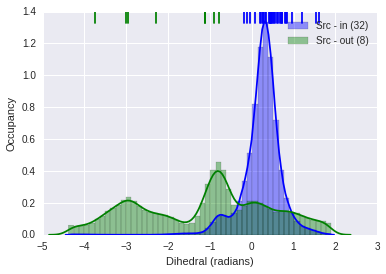

In [9]:
# Plot vertical lines at dihedral for first frames
#for i in range(len(Abl_line_rotate)):
#        plt.axvline(Abl_line_rotate[i], color="r")
#for i in range(len(Src_line_rotate)):
#        plt.axvline(Src_line_rotate[i], color="b")
#plt.vline can set y range.

#Plot just vertical lines for Src DFG out

Src_line_rotate_out = np.vstack([ Src_line_rotate[index] for index in Src_DFG_out[0]])
Src_line_rotate_in = np.vstack([ Src_line_rotate[index] for index in Src_DFG_in[0]])

for i in range(len(Src_line_rotate_in)):
        plt.axvline(Src_line_rotate_in[i], color="b", ymin=0.95)
for i in range(len(Src_line_rotate_out)):
        plt.axvline(Src_line_rotate_out[i], color="g", ymin=0.95)

# Plot histogram with special seaborn sauce
#sns.distplot(abl_in, color="r",label="Abl - in (%s) " %len(Abl_DFG_in[0]) )
#sns.distplot(abl_out, color="m",label="Abl - out (%s) " %len(Abl_DFG_out[0]) )
sns.distplot(src_in, color="b",label="Src - in (%s) " %len(Src_DFG_in[0]) )
sns.distplot(src_out, color="g",label="Src - out (%s)" %len(Src_DFG_out[0]) )

plt.xlabel('Dihedral (radians)')
plt.ylabel('Occupancy')
plt.legend()

So this makes it look like we are seeing the DFG flip! Let's look a little closer, at individual trajectories starting from the DFG-out conformation.

In [10]:
Src_dihedral = np.load('Src_dihedral_newsims_separate.npy')

(array([ 5,  8, 19, 25, 29, 30, 31, 39]), array([0, 0, 0, 0, 0, 0, 0, 0]))


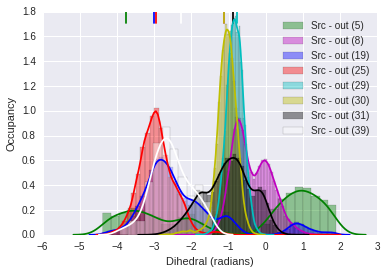

In [11]:
# Rotate dihedral so histogram doesn't get cut in figure
import math

#Note Src_dihedral was imported
Src_rotate = [ np.array( [S-(2*math.pi) if S >= 1.9 else S for S in run ] ) for run in Src_dihedral[0] ]

#While Src_lines assumes you've already run some of the code above
Src_line_rotate =  [S-(2*math.pi) if S >= 1.9 else S for S in Src_lines]

# Define which sims start in DFG-in vs DFG-out conformation
Src_line_rotate = np.asarray(Src_line_rotate)

Src_DFG_in = np.where(Src_line_rotate > -0.5)
Src_DFG_out = np.where(Src_line_rotate < -0.5)

print Src_DFG_out

# Define 8 src_out runs.
#src_out = np.vstack([ Src_rotate[index] for index in Src_DFG_out[0]])
src_out_0 = np.vstack([ Src_rotate[Src_DFG_out[0][0]] ])
src_out_1 = np.vstack([ Src_rotate[Src_DFG_out[0][1]] ])
src_out_2 = np.vstack([ Src_rotate[Src_DFG_out[0][2]] ])
src_out_3 = np.vstack([ Src_rotate[Src_DFG_out[0][3]] ])
src_out_4 = np.vstack([ Src_rotate[Src_DFG_out[0][4]] ])
src_out_5 = np.vstack([ Src_rotate[Src_DFG_out[0][5]] ])
src_out_6 = np.vstack([ Src_rotate[Src_DFG_out[0][6]] ])
src_out_7 = np.vstack([ Src_rotate[Src_DFG_out[0][7]] ])

#Plot just vertical lines for Src DFG out

Src_line_rotate_out = np.vstack([ Src_line_rotate[index] for index in Src_DFG_out[0]])

plt.axvline(Src_line_rotate_out[0], color="g", ymin=0.95)
plt.axvline(Src_line_rotate_out[1], color="m", ymin=0.95)
plt.axvline(Src_line_rotate_out[2], color="b", ymin=0.95)
plt.axvline(Src_line_rotate_out[3], color="r", ymin=0.95)
plt.axvline(Src_line_rotate_out[4], color="c", ymin=0.95)
plt.axvline(Src_line_rotate_out[5], color="y", ymin=0.95)
plt.axvline(Src_line_rotate_out[6], color="k", ymin=0.95)
plt.axvline(Src_line_rotate_out[7], color="w", ymin=0.95)

# Plot histogram with special seaborn sauce
sns.distplot(src_out_0, color="g",label="Src - out (%s)" %Src_DFG_out[0][0] )
sns.distplot(src_out_1, color="m",label="Src - out (%s)" %Src_DFG_out[0][1] )
sns.distplot(src_out_2, color="b",label="Src - out (%s)" %Src_DFG_out[0][2] )
sns.distplot(src_out_3, color="r",label="Src - out (%s)" %Src_DFG_out[0][3] )
sns.distplot(src_out_4, color="c",label="Src - out (%s)" %Src_DFG_out[0][4] )
sns.distplot(src_out_5, color="y",label="Src - out (%s)" %Src_DFG_out[0][5] )
sns.distplot(src_out_6, color="k",label="Src - out (%s)" %Src_DFG_out[0][6] )
sns.distplot(src_out_7, color="w",label="Src - out (%s)" %Src_DFG_out[0][7] )

plt.xlabel('Dihedral (radians)')
plt.ylabel('Occupancy')
plt.legend()